# Weather analysis - Approaching Equator

Data's true power lies in its ability to answer questions definitively. In this project, we are going to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we all might think, "Duh. It gets hotter..."

But let's try and prove it.

NOTE: This project takes into account only the weather info from one particular day. This can be viewed as a proof as concept

In [53]:
#Import Dependencies
from config import api_keys
from citipy import citipy

import random
import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

# Set style for plots
plt.style.use("seaborn")

## Choosing representative sample set

In [3]:
# For the selected coordinates, use citipy to associate them with nearest city.

cities_df["Closest City name"] = ""
cities_df["Closest Country code"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"Closest City name",city.city_name)
    cities_df.set_value(index,"Closest Country code",city.country_code)


In [4]:
# Dropping random lat and lon samples from dataframe as they are not the exact coordinates for the cities.

clean_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
clean_cities_df

# Dropping duplicate cities which may have resulted in the previous step
clean_cities_df = clean_cities_df.drop_duplicates()

clean_cities_df.shape



(874, 2)

In [5]:

# Picking a sample of 500 cities to proceed with analysis
selected_cities = clean_cities_df.sample(500)

selected_cities = selected_cities.reset_index(drop=True)


## Fetch City Weather info - OpenWeatherMap 

In [6]:
# Setting up values for OpenWeatherMap API calls
base_url = "http://api.openweathermap.org/data/2.5/weather"

app_id = api_keys["open_weather_map_common"]

params = { "appid" :app_id,"units":"metric" }

In [7]:
# SAMPLE JSON RESPONSE - 
#{"coord":{"lon":-0.13,"lat":51.51},
#"weather":[{"id":300,"main":"Drizzle","description":"light intensity drizzle","icon":"09d"}],
#"base":"stations",
#"main":{"temp":280.32,"pressure":1012,"humidity":81,"temp_min":279.15,"temp_max":281.15},
#"visibility":10000,
# "wind":{"speed":4.1,"deg":80},
# "clouds":{"all":90},
# "dt":1485789600,
# "sys":{"type":1,"id":5091,"message":0.0103,"country":"GB","sunrise":1485762037,"sunset":1485794875},
# "id":2643743,"name":"London","cod":200}

def encrypt_key(input_url):
    return input_url[0:53]+"<YourKey>"+input_url[85:]

for index,row in selected_cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    print(encrypt_key(city_weather_resp.url))
    city_weather_resp  = city_weather_resp.json()
    selected_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    selected_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    selected_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    selected_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    selected_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    selected_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))
    


Retrieving weather information for ponta delgada,pt
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=ponta+delgada%2Cpt
Retrieving weather information for avarua,ck
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=avarua%2Cck
Retrieving weather information for pangnirtung,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=pangnirtung%2Cca
Retrieving weather information for semirom,ir
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=semirom%2Cir
Retrieving weather information for kuytun,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kuytun%2Ccn
Retrieving weather information for kang,bw
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kang%2Cbw
Retrieving weather information for dalby,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=dalby%2Cau
Retrieving weather information for 

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=severnyy%2Cru
Retrieving weather information for burnie,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=burnie%2Cau
Retrieving weather information for charters towers,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=charters+towers%2Cau
Retrieving weather information for itarema,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=itarema%2Cbr
Retrieving weather information for tabiauea,ki
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=tabiauea%2Cki
Retrieving weather information for chernyshevskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=chernyshevskiy%2Cru
Retrieving weather information for herat,af
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=herat%2Caf
Retrieving weather information for kota kinabalu,my
http://a

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=ketchikan%2Cus
Retrieving weather information for roald,no
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=roald%2Cno
Retrieving weather information for sur,om
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=sur%2Com
Retrieving weather information for laguna,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=laguna%2Cbr
Retrieving weather information for aiquile,bo
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=aiquile%2Cbo
Retrieving weather information for dembi dolo,et
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=dembi+dolo%2Cet
Retrieving weather information for palaiokhora,gr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=palaiokhora%2Cgr
Retrieving weather information for corsicana,us
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=severomorsk%2Cru
Retrieving weather information for almaznyy,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=almaznyy%2Cru
Retrieving weather information for fort wellington,gy
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=fort+wellington%2Cgy
Retrieving weather information for lerwick,gb
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=lerwick%2Cgb
Retrieving weather information for hermanus,za
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=hermanus%2Cza
Retrieving weather information for greenwood,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=greenwood%2Cus
Retrieving weather information for challapata,bo
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=challapata%2Cbo
Retrieving weather information for mountain home,us
h

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=antalaha%2Cmg
Retrieving weather information for lormont,fr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=lormont%2Cfr
Retrieving weather information for sindand,af
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=sindand%2Caf
Retrieving weather information for acarau,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=acarau%2Cbr
Retrieving weather information for monforte de lemos,es
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=monforte+de+lemos%2Ces
Retrieving weather information for bondo,cd
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=bondo%2Ccd
Retrieving weather information for waipawa,nz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=waipawa%2Cnz
Retrieving weather information for tawau,my
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=corum%2Ctr
Retrieving weather information for kogon,uz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kogon%2Cuz
Retrieving weather information for farafangana,mg
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=farafangana%2Cmg
Retrieving weather information for nampa,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=nampa%2Cus
Retrieving weather information for russellville,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=russellville%2Cus
Retrieving weather information for halalo,wf
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=halalo%2Cwf
Retrieving weather information for xinye,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=xinye%2Ccn
Retrieving weather information for jining,cn
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=talawdi%2Csd
Retrieving weather information for xai-xai,mz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=xai-xai%2Cmz
Retrieving weather information for chicama,pe
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=chicama%2Cpe
Retrieving weather information for kokkola,fi
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kokkola%2Cfi
Retrieving weather information for mingshui,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mingshui%2Ccn
Retrieving weather information for moerai,pf
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=moerai%2Cpf
Retrieving weather information for birao,cf
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=birao%2Ccf
Retrieving weather information for pangai,to
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kuusamo%2Cfi
Retrieving weather information for puerto suarez,bo
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=puerto+suarez%2Cbo
Retrieving weather information for vanimo,pg
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=vanimo%2Cpg
Retrieving weather information for geresk,af
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=geresk%2Caf
Retrieving weather information for isangel,vu
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=isangel%2Cvu
Retrieving weather information for totness,sr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=totness%2Csr
Retrieving weather information for shelburne,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=shelburne%2Cca
Retrieving weather information for conway,us
http://api.openweathermap.org/

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mataura%2Cpf
Retrieving weather information for chiredzi,zw
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=chiredzi%2Czw
Retrieving weather information for bend,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=bend%2Cus
Retrieving weather information for salalah,om
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=salalah%2Com
Retrieving weather information for saint john,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=saint+john%2Cca
Retrieving weather information for darnah,ly
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=darnah%2Cly
Retrieving weather information for esperance,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=esperance%2Cau
Retrieving weather information for marrakesh,ma
http://api.openweathermap.org/data/

In [19]:
# Drop cities with missing information
selected_cities = selected_cities.dropna()

selected_cities.shape
selected_cities.to_csv("City_Weather_data.csv")

## Analysing Weather Features

In [9]:
# Plot settings
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

###   1. Temperature vs Latitude

In [24]:
# Temperature vs Latitude 
selected_cities.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")

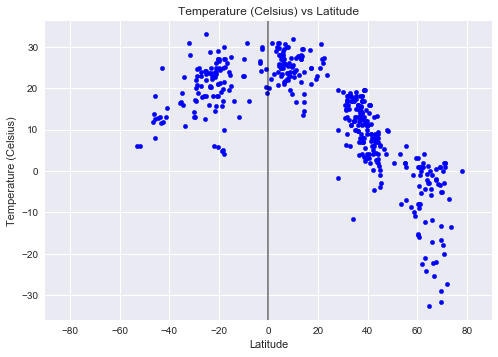

In [25]:
set_plot_prop("Latitude",[-90,90],"Temperature (Celsius)")
plt.axvline(0, color='black',alpha=0.5)
plt.show()

#### Observation # 1 - Temperature is at it's peak around equator. This clearly shows that temperature increases as it approaches equator

###   2. Humidity vs Latitude

In [12]:
# Humidity vs Latitude 

selected_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")

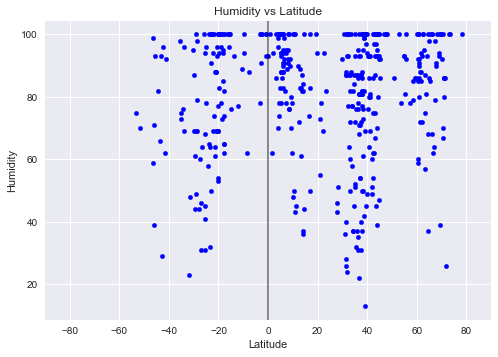

In [13]:
set_plot_prop("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.5)
plt.show()

#### Observation # 2 - Humidity around Equator seems to be in the range on 25 - 100, which is pretty similar to parts far from Equator

###   3. Wind Speed vs Latitude 

In [14]:
# Wind speed vs Latitude
selected_cities["Wind speed"] = pd.to_numeric(selected_cities["Wind speed"])
selected_cities.plot(kind="scatter",x="Latitude",y="Wind speed",grid=True,color="blue")

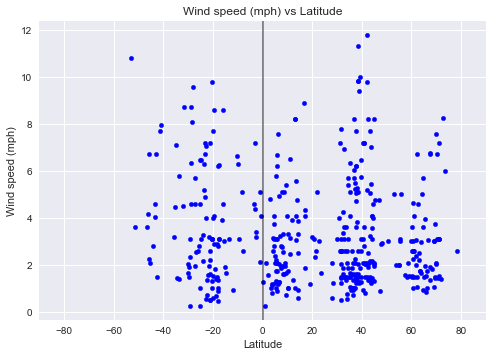

In [15]:
set_plot_prop("Latitude",[-90,90],"Wind speed (mph)")
plt.axvline(0, color='black',alpha=0.5)
plt.show()

#### Observation # 3 - Wind speed for most cities seem to fall under 10 mph. This is not different around equator

###   4. Cloudiness vs Latitude

In [37]:
# Cloudiness vs Latitude
selected_cities["Cloudiness"] = pd.to_numeric(selected_cities["Cloudiness"])
selected_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")

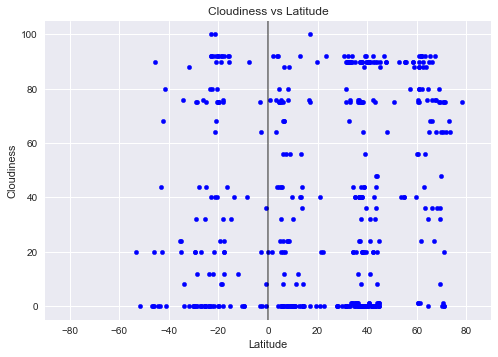

In [17]:
set_plot_prop("Latitude",[-90,90],"Cloudiness")
plt.axvline(0, color='black',alpha=0.5)
plt.show()

#### Observation # 4 - Cloudiness seems well spread out for this day. No correlation visible with latitude 

## Temperature approaching equator

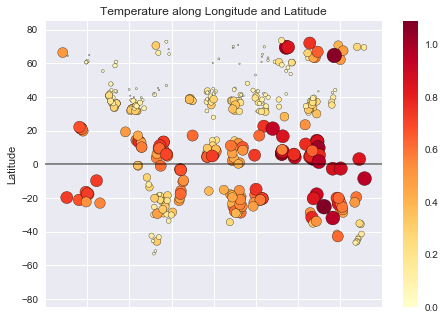

In [56]:
# Temperature approaching equator
size_temp = np.round((((selected_cities.Temperature)/100)**2)*10,2)

selected_cities.plot(kind="scatter",x="Longitude",y="Latitude",grid=True, edgecolor="black",
                     c=size_temp,s=size_temp*200,cmap=plt.cm.YlOrRd)
plt.xlabel("Longitude")
plt.tight_layout()
plt.title("Temperature along Longitude and Latitude")
plt.ylabel("Latitude")
plt.ylim([-85,85])
plt.grid(True)

plt.xlim([-200,200])
plt.subplots_adjust(bottom=.25, left=.25)

plt.axhline(0, color='black',alpha=0.5)

plt.show()

### Conclusive Observation 

The Temperature along Latitude and Longitude chart clearly represents that the the zone around the equator line has most of the red points, which indicates hotter temperatures. So, we can come to a conclusion that temperature gets hotter as it approaches the equator.